In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

CHHS_Path = "./Resources/CHHS_Vaccines_Administered_by_County/130d7ba2-b6eb-438d-a412-741bde207e1c (1).csv"
Census_Path = "./Resources/Census_Demo_Stats_by_County/ACSDP5Y2019.DP02_data_with_overlays_2021-08-05T001535.csv"

censusDemo_df = pd.read_csv(Census_Path)

#Fixes header for the dataframe
newHeader = censusDemo_df.iloc[0]
censusDemo_df = censusDemo_df[1:]
censusDemo_df.columns = newHeader

CHHS_df = pd.read_csv(CHHS_Path)

censusDemo_df.head()


,id,Geographic Area Name,Estimate!!HOUSEHOLDS BY TYPE!!Total households,Margin of Error!!HOUSEHOLDS BY TYPE!!Total households,Percent!!HOUSEHOLDS BY TYPE!!Total households,Percent Margin of Error!!HOUSEHOLDS BY TYPE!!Total households,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Margin of Error!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Percent Margin of Error!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,...,Percent!!COMPUTERS AND INTERNET USE!!Total households,Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription
1,0500000US06001,"Alameda County, California",577177,1744,577177,(X),292079,2496,50.6,0.4,...,577177,(X),544335,1892,94.3,0.2,513047,2175,88.9,0.3
2,0500000US06003,"Alpine County, California",350,69,350,(X),194,47,55.4,9.8,...,350,(X),325,65,92.9,4.2,289,58,82.6,5.7
3,0500000US06005,"Amador County, California",14594,448,14594,(X),7954,496,54.5,2.8,...,14594,(X),13258,472,90.8,1.8,12351,456,84.6,2.0
4,0500000US06007,"Butte County, California",85320,891,85320,(X),37211,821,43.6,0.9,...,85320,(X),78951,1042,92.5,0.6,72838,1161,85.4,0.9
5,0500000US06009,"Calaveras County, California",16942,552,16942,(X),9119,538,53.8,3.2,...,16942,(X),15186,573,89.6,1.7,13935,601,82.3,2.1


In [2]:
countyList = ["Alameda", "Alpine", "Amador", "Butte", "Calaveras", "Colusa", "Contra Costa", "Del Norte", "El Dorado", "Fresno", 
              "Glenn", "Humboldt", "Imperial", "Inyo", "Kern", "Kings", "Lake", "Lassen", "Los Angeles", "Madera", 
              "Marin", "Mariposa", "Mendocino", "Merced", "Modoc", "Mono", "Monterey", "Napa", "Nevada", "Orange", "Placer", 
              "Plumas", "Riverside", "Sacramento", "San Benito", "San Bernardino", "San Diego", "San Francisco", "San Joaquin", 
              "San Luis Obispo", "San Mateo", "Santa Barbara", "Santa Clara", "Santa Cruz", "Shasta", "Sierra", "Siskiyou", "Solano", 
              "Sonoma", "Stanislaus", "Sutter", "Tehama", "Trinity", "Tulare", "Tuolumne", "Ventura", "Yolo", "Yuba"]

totalFullyVax = []

county_df = pd.DataFrame({"County" : []})

#add list of counties to dataframe
county_df["County"] = countyList

#remove numerical index and replace with county names
county_df.set_index("County", inplace = True)


In [17]:
#compile dataframe for use with plots
for x in countyList:
    county_df.loc[x, "Total Fully Vaccinated"] = CHHS_df.loc[CHHS_df['county'] == x, "fully_vaccinated"].sum()
    county_df.loc[x, "Avg People per Household"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average household size'].sum()
    county_df.loc[x, "Grandparents living w/ grandchildren under 18"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years'].sum()

In [24]:
#function for linear regression
def plotLinearRegression(xValues, yValues, title, xLabel, yLabel, textCoordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
    regressValues = xValues * slope + intercept
    lineEquation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(xValues, yValues)
    plt.plot(xValues, regressValues, "r-", color = "orange")
    plt.annotate(lineEquation, textCoordinates, fontsize = 10, color = "orange")
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    print(f"r is : {rvalue}")
    plt.show()

In [18]:
county_df

,Total Fully Vaccinated,Avg People per Household,Grandparents living w/ grandchildren under 18
County,,,
Alameda,1085847.0,2.82,44432
Alpine,689.0,2.87,55
Amador,15481.0,2.38,1066
Butte,88630.0,2.57,4152
Calaveras,18304.0,2.66,1002
Colusa,8758.0,2.94,630
Contra Costa,751992.0,2.87,29811
Del Norte,9385.0,2.47,888
El Dorado,93938.0,2.63,3347


[1085847, 689, 15481, 88630, 18304, 8758, 751992, 9385, 93938, 427152, 11408, 69288, 106174, 8471, 324528, 44863, 26863, 6154, 5531873, 59935, 190760, 5348, 45277, 91182, 2999, 8137, 234495, 87351, 49475, 1807537, 205545, 8527, 1063482, 775028, 32041, 887362, 1939627, 617215, 320886, 145378, 523268, 241082, 1354751, 159408, 59262, 1415, 16281, 218828, 309058, 221245, 41357, 19747, 4643, 170460, 22085, 477378, 120816, 25599]
['2.82', '2.87', '2.38', '2.57', '2.66', '2.94', '2.87', '2.47', '2.63', '3.14', '2.74', '2.41', '3.81', '2.18', '3.17', '3.13', '2.46', '2.26', '2.99', '3.28', '2.40', '2.13', '2.47', '3.32', '2.33', '2.93', '3.27', '2.78', '2.40', '3.01', '2.67', '2.16', '3.28', '2.76', '3.31', '3.29', '2.87', '2.36', '3.17', '2.51', '2.87', '2.91', '2.95', '2.72', '2.47', '2.28', '2.23', '2.88', '2.59', '3.09', '2.91', '2.61', '2.09', '3.30', '2.24', '3.08', '2.81', '2.84']


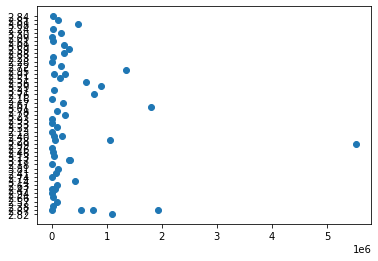

In [41]:

county_df["Total Fully Vaccinated"] = pd.to_numeric(county_df["Total Fully Vaccinated"], downcast="integer")
county_df["Grandparents living w/ grandchildren under 18"] = pd.to_numeric(county_df["Grandparents living w/ grandchildren under 18"], downcast="integer")

totalFullyVax = county_df["Total Fully Vaccinated"].values.tolist()
avgPeopleHouse = county_df["Avg People per Household"].values.tolist()

print(totalFullyVax)
print(avgPeopleHouse)

plt.scatter(totalFullyVax, avgPeopleHouse)
#plotLinearRegression(totalFullyVax, grandparentsGchildrenUnd18, "test", "test", "test", (60,60))